In [151]:
# 필수 라이브러리
import pandas as pd
import numpy as np
from sklearn import metrics

In [193]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
submission1_x = pd.read_csv('/content/drive/My Drive/1_x.csv')
submission1_y = pd.read_csv('/content/drive/My Drive/1_y.csv')
submission2_x = pd.read_csv('/content/drive/My Drive/2_x.csv')
submission2_y = pd.read_csv('/content/drive/My Drive/2_y.csv')
submission1_predict = pd.read_csv('/content/drive/My Drive/submission1_predict.csv')
submission2_predict = pd.read_csv('/content/drive/My Drive/submission2_predict.csv')

In [203]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
submission2_predict = submission2_predict.rename(columns={'time_stamp': 'ds'})
def scale_features(df):
    features_to_scale = df.columns.difference(['ds'])
    scaler = MinMaxScaler()
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    return df
submission2_predict = scale_features(submission2_predict)

In [204]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1_x.csv의 time_stamp를 ds로 사용
submission1_x  = submission1_x.rename(columns={'time_stamp': 'ds'})
submission1_predict = submission1_predict.rename(columns={'time_stamp': 'ds'})
submission2_x  = submission2_x.rename(columns={'time_stamp': 'ds'})
submission2_predict = submission2_predict.rename(columns={'time_stamp': 'ds'})
def scale_features(df):
    features_to_scale = df.columns.difference(['ds'])
    scaler = MinMaxScaler()
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    return df

# 가정: 각 데이터프레임은 원본 데이터입니다.
# submission1_x = pd.read_csv("submission1_x.csv")
# submission2_x = pd.read_csv("submission2_x.csv")
# submission1_predict = pd.read_csv("submission1_predict.csv")
# submission2_predict = pd.read_csv("submission2_predict.csv")

# 스케일링 적용
submission1_x = scale_features(submission1_x)
submission2_x = scale_features(submission2_x)
submission1_predict = scale_features(submission1_predict)
submission2_predict = scale_features(submission2_predict)

In [205]:
submission1_x

,ds,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual
0,2019-03-06 10:52:33,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.917712,0.166667,0.714286,...,0.503511,0.0,0.789983,0.648292,0.777778,0.304315,0.758621,1.000000,0.000000,0.50
1,2019-03-06 10:52:38,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.937221,0.333333,0.785714,...,0.503511,0.0,0.808692,0.507609,0.888889,0.550970,0.886700,0.919023,0.009804,0.50
2,2019-03-06 10:52:40,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.967570,0.333333,0.785714,...,0.503511,0.0,0.852810,0.437268,0.888889,0.576220,0.753695,0.891798,0.009804,0.50
3,2019-03-06 10:52:42,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.882183,0.333333,0.785714,...,0.503511,0.0,0.855018,0.366926,0.888889,0.343885,0.807882,0.890750,0.009804,0.50
4,2019-03-06 10:52:43,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.882556,0.333333,0.785714,...,0.503511,0.0,0.860596,0.366926,0.888889,0.631053,1.000000,0.866667,0.009804,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,2019-03-06 14:47:13,0.0,1.000000,0.5,0.027778,1.000000,0.5,0.932968,0.166667,0.357143,...,1.000000,1.0,0.723516,0.507609,0.444444,0.209911,0.108374,0.474346,0.941176,0.25
11266,2019-03-06 14:47:16,0.0,1.000000,0.5,0.027778,1.000000,0.5,0.938157,0.166667,0.357143,...,1.000000,1.0,0.756168,0.507609,0.444444,0.306199,0.039409,0.457941,0.941176,0.25
11267,2019-03-06 14:47:17,0.0,1.000000,0.5,0.027778,1.000000,0.5,0.930578,0.166667,0.357143,...,1.000000,1.0,0.872100,0.507609,0.444444,0.399096,0.177340,0.458639,0.941176,0.25
11268,2019-03-06 14:47:18,0.0,1.000000,0.5,0.027778,1.000000,0.5,0.932486,0.166667,0.357143,...,1.000000,1.0,0.815199,0.507609,0.444444,0.257019,0.108374,0.483770,0.941176,0.25


In [ ]:
!pip install prophet

In [206]:
# 원래 ds 칼럼을 저장
original_ds = submission1_x['ds'].copy()
original_ds_predict = submission1_predict['ds'].copy()

# 중앙값 필터를 적용하여 스무딩
submission1_x = submission1_x.rolling(window=5).median()
submission1_x = submission1_x.fillna(method='bfill')  # 또는 'ffill'을 사용

submission1_predict = submission1_predict.rolling(window=5).median()
submission1_predict = submission1_predict.fillna(method='bfill')  # 또는 'ffill'을 사용

# 원래 ds 칼럼을 복구
submission1_x['ds'] = original_ds
submission1_predict['ds'] = original_ds_predict

<ipython-input-206-c6d706b62e60>:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  submission1_x = submission1_x.rolling(window=5).median()
<ipython-input-206-c6d706b62e60>:9: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  submission1_predict = submission1_predict.rolling(window=5).median()


In [207]:
submission1_x

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual,ds
0,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.917712,0.333333,0.785714,0.112622,...,0.0,0.852810,0.437268,0.888889,0.550970,0.807882,0.891798,0.009804,0.50,2019-03-06 10:52:33
1,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.917712,0.333333,0.785714,0.112622,...,0.0,0.852810,0.437268,0.888889,0.550970,0.807882,0.891798,0.009804,0.50,2019-03-06 10:52:38
2,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.917712,0.333333,0.785714,0.112622,...,0.0,0.852810,0.437268,0.888889,0.550970,0.807882,0.891798,0.009804,0.50,2019-03-06 10:52:40
3,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.917712,0.333333,0.785714,0.112622,...,0.0,0.852810,0.437268,0.888889,0.550970,0.807882,0.891798,0.009804,0.50,2019-03-06 10:52:42
4,1.0,0.361702,0.0,0.000000,0.809688,0.0,0.917712,0.333333,0.785714,0.112622,...,0.0,0.852810,0.437268,0.888889,0.550970,0.807882,0.891798,0.009804,0.50,2019-03-06 10:52:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,0.0,1.000000,0.5,0.027778,1.000000,0.5,0.935749,0.166667,0.285714,0.646272,...,1.0,0.753341,0.507609,0.333333,0.313548,0.147783,0.458639,0.941176,0.25,2019-03-06 14:47:13
11266,0.0,1.000000,0.5,0.027778,1.000000,0.5,0.935749,0.166667,0.285714,0.649218,...,1.0,0.756168,0.507609,0.333333,0.307518,0.118227,0.458639,0.941176,0.25,2019-03-06 14:47:16
11267,0.0,1.000000,0.5,0.027778,1.000000,0.5,0.935749,0.166667,0.357143,0.649218,...,1.0,0.787853,0.507609,0.444444,0.351988,0.118227,0.458639,0.941176,0.25,2019-03-06 14:47:17
11268,0.0,1.000000,0.5,0.027778,1.000000,0.5,0.932968,0.166667,0.357143,0.655337,...,1.0,0.787853,0.507609,0.444444,0.306199,0.108374,0.458639,0.941176,0.25,2019-03-06 14:47:18


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage1.Output.Measurement0.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/cvpcigla.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/k9fvfiw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23474', 'data', 'file=/tmp/tmpgo43gpwg/cvpcigla.json', 'init=/tmp/tmpgo43gpwg/k9fvfiw4.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model7ti5f062/prophet_model-20230927083110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:31:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:31:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


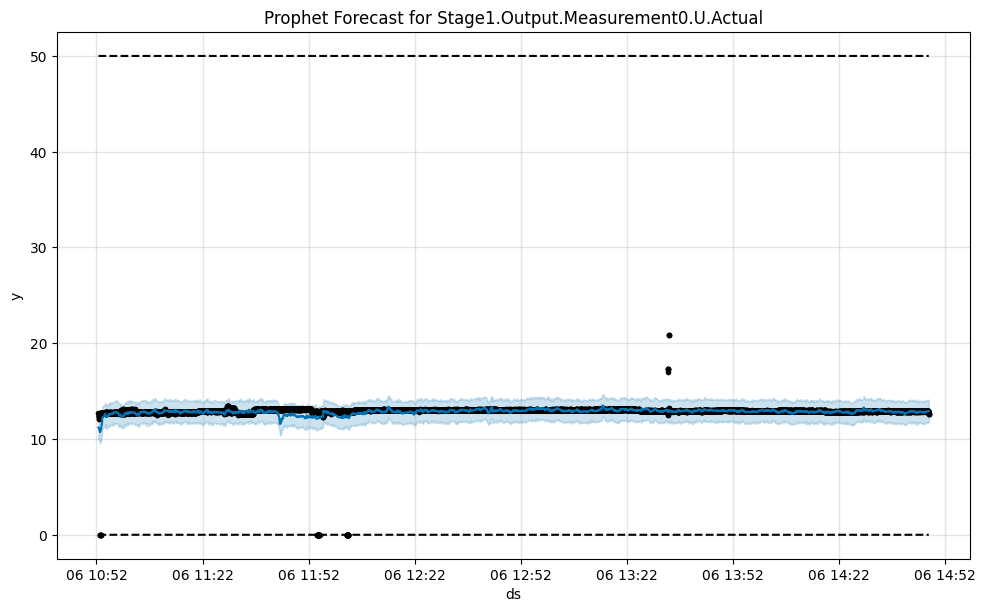

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage1.Output.Measurement1.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/5jxp9kse.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/73jbmgyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88558', 'data', 'file=/tmp/tmpgo43gpwg/5jxp9kse.json', 'init=/tmp/tmpgo43gpwg/73jbmgyw.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_models3lj9h8p/prophet_model-20230927083134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:31:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:32:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


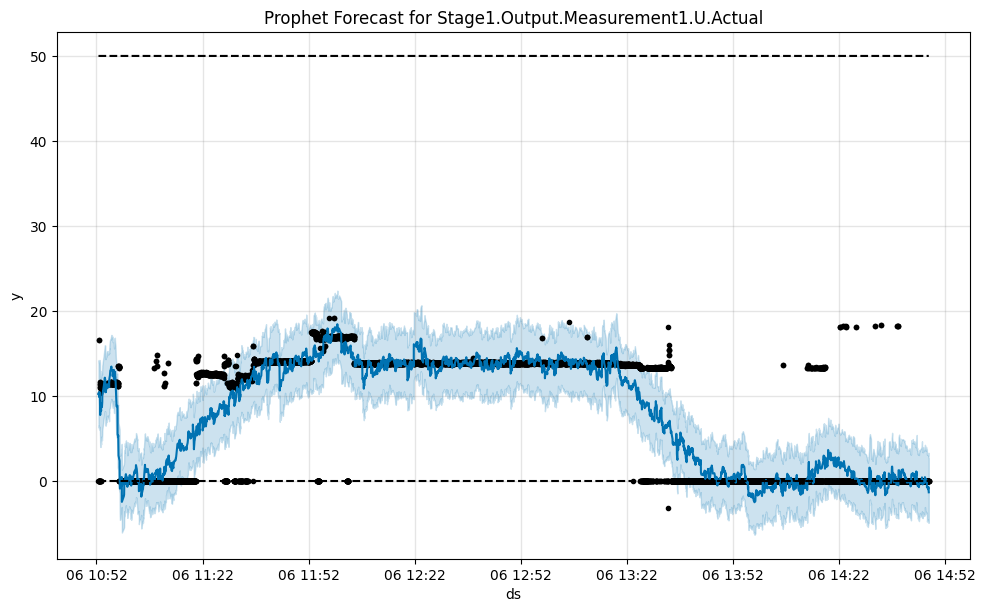

Training model for Stage1.Output.Measurement2.U.Actual...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/kcbfl9ri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/aipt4qys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11078', 'data', 'file=/tmp/tmpgo43gpwg/kcbfl9ri.json', 'init=/tmp/tmpgo43gpwg/aipt4qys.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model55mw7ccb/prophet_model-20230927083214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:32:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:32:33 - cmdstanpy - INFO - Chain

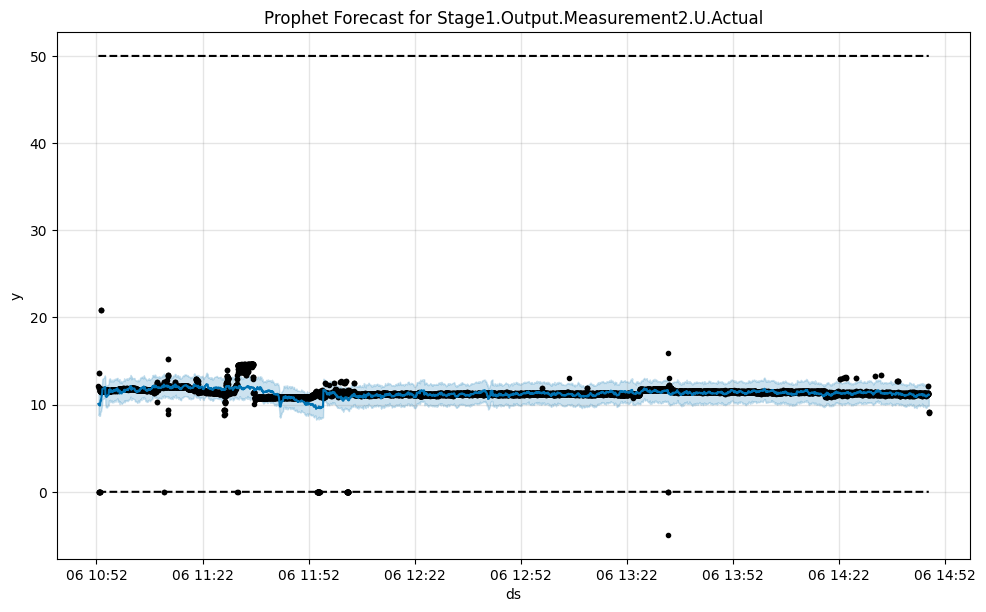

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage1.Output.Measurement3.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/_o3niojq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/zb6eamtb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71750', 'data', 'file=/tmp/tmpgo43gpwg/_o3niojq.json', 'init=/tmp/tmpgo43gpwg/zb6eamtb.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modeliac6tnl3/prophet_model-20230927083237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:32:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:33:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


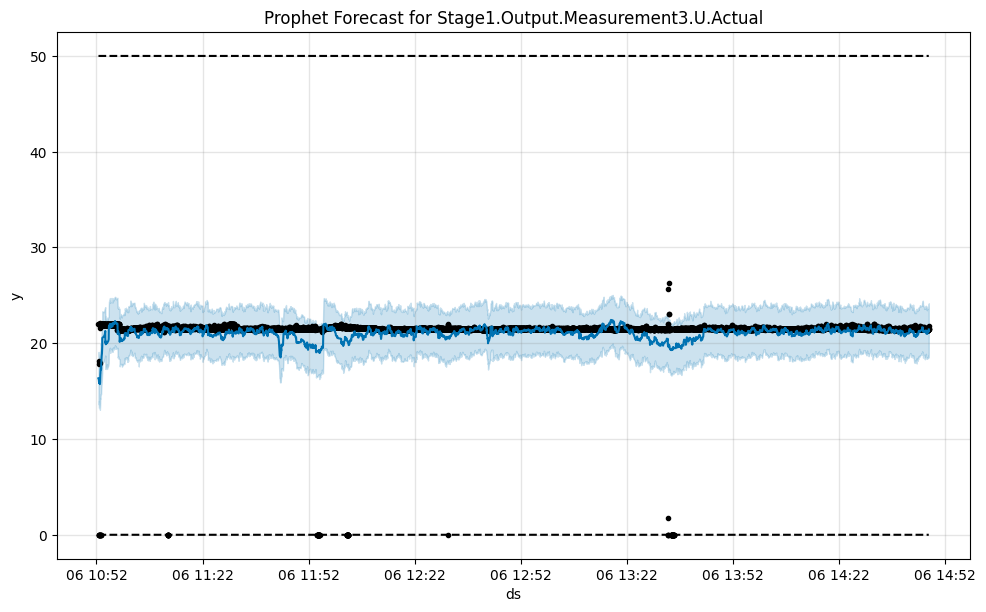

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage1.Output.Measurement4.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/9mb5n7yv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/pr4gmc7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15047', 'data', 'file=/tmp/tmpgo43gpwg/9mb5n7yv.json', 'init=/tmp/tmpgo43gpwg/pr4gmc7a.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modeloppz3tgm/prophet_model-20230927083313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:33:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


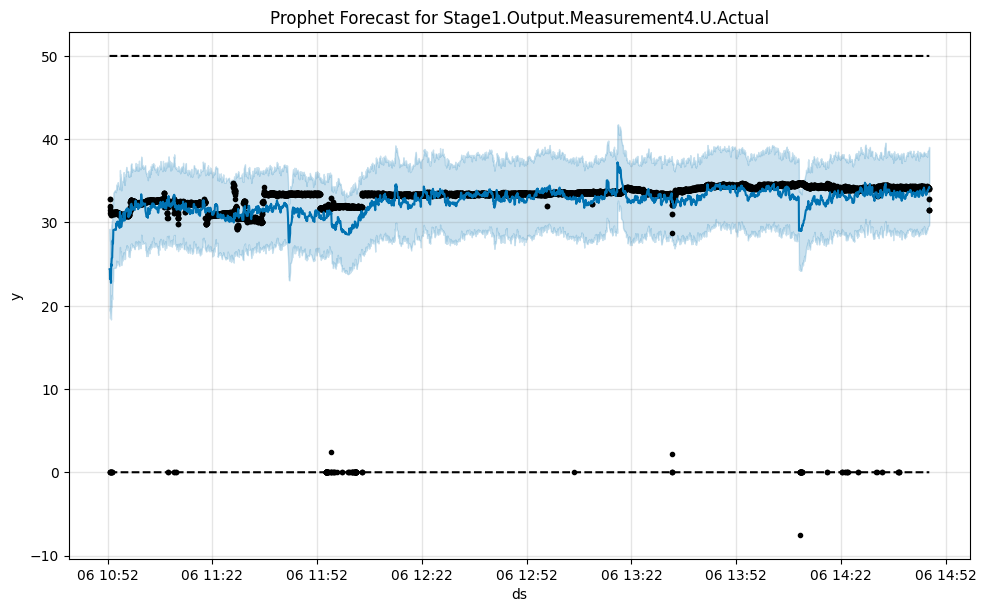

Training model for Stage1.Output.Measurement5.U.Actual...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/cf8bpnbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/ygadw7d2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41726', 'data', 'file=/tmp/tmpgo43gpwg/cf8bpnbi.json', 'init=/tmp/tmpgo43gpwg/ygadw7d2.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelw7edhgpy/prophet_model-20230927083329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:34:09 - cmdstanpy - INFO - Chain

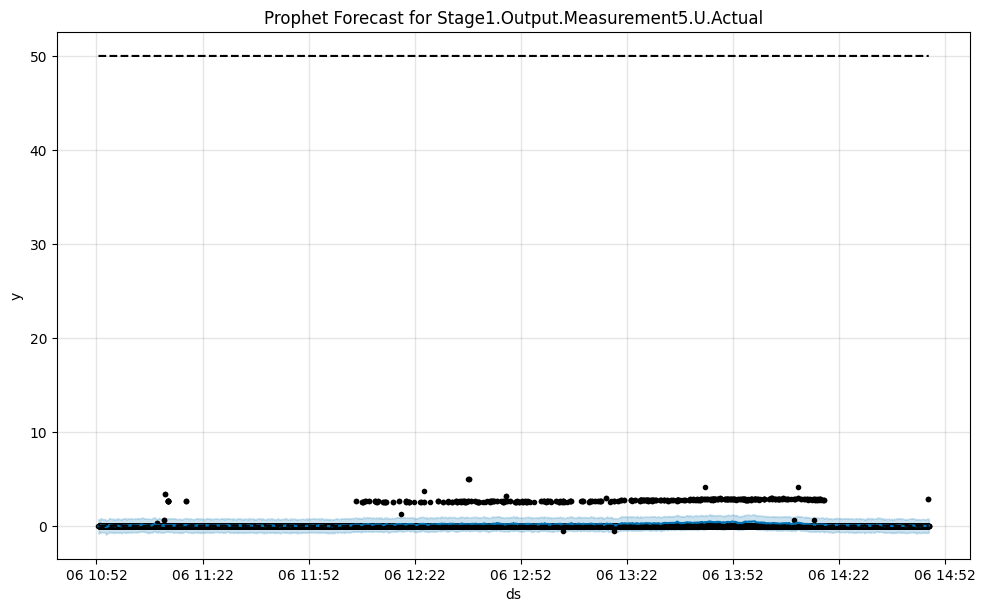

Training model for Stage1.Output.Measurement6.U.Actual...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/cn29bnpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/kf2i9c0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52717', 'data', 'file=/tmp/tmpgo43gpwg/cn29bnpa.json', 'init=/tmp/tmpgo43gpwg/kf2i9c0l.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelxxs47i9g/prophet_model-20230927083414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:34:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:34:38 - cmdstanpy - INFO - Chain

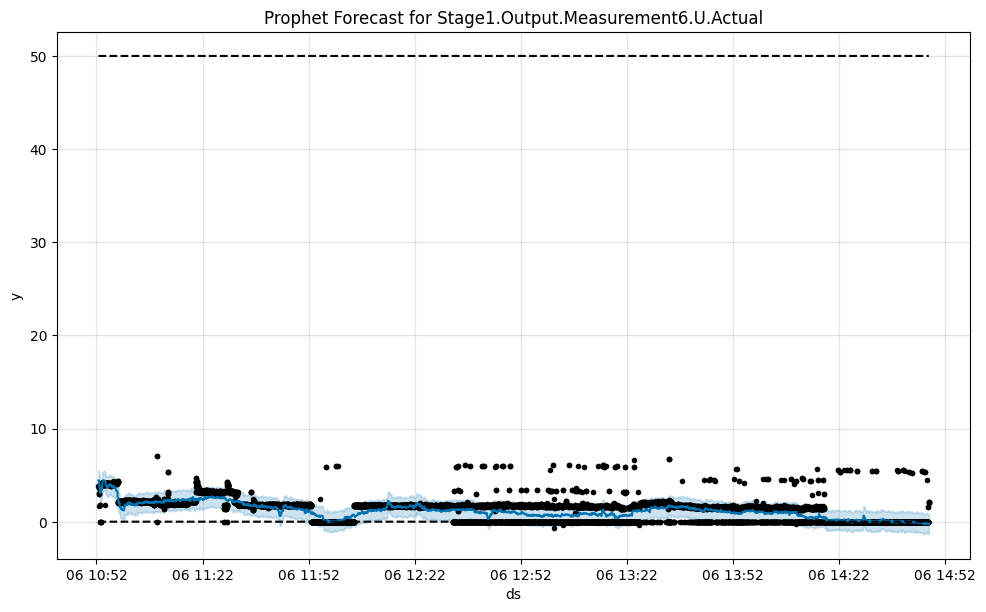

Training model for Stage1.Output.Measurement7.U.Actual...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/bj0z14_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/9388tsib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69895', 'data', 'file=/tmp/tmpgo43gpwg/bj0z14_7.json', 'init=/tmp/tmpgo43gpwg/9388tsib.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelroxmjtzx/prophet_model-20230927083443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:34:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:35:32 - cmdstanpy - INFO - Chain

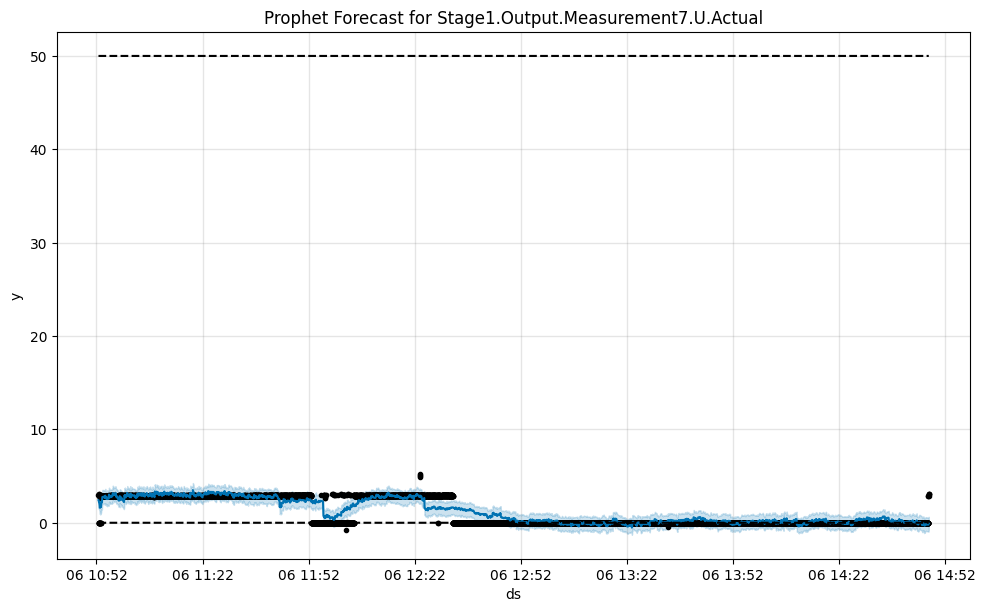

Training model for Stage1.Output.Measurement8.U.Actual...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/90rywu1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/kq129fp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33023', 'data', 'file=/tmp/tmpgo43gpwg/90rywu1w.json', 'init=/tmp/tmpgo43gpwg/kq129fp7.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelff2cr932/prophet_model-20230927083537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:35:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:36:28 - cmdstanpy - INFO - Chain

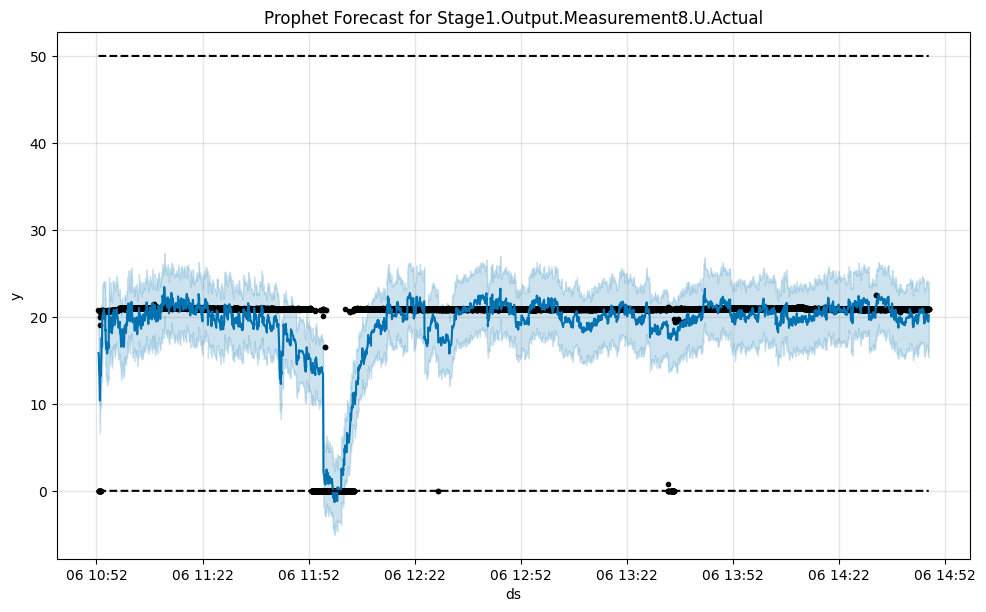

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage1.Output.Measurement9.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/kwsxt27b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/4_qkz7pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15210', 'data', 'file=/tmp/tmpgo43gpwg/kwsxt27b.json', 'init=/tmp/tmpgo43gpwg/4_qkz7pw.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model0se1nix0/prophet_model-20230927083631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:36:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:36:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


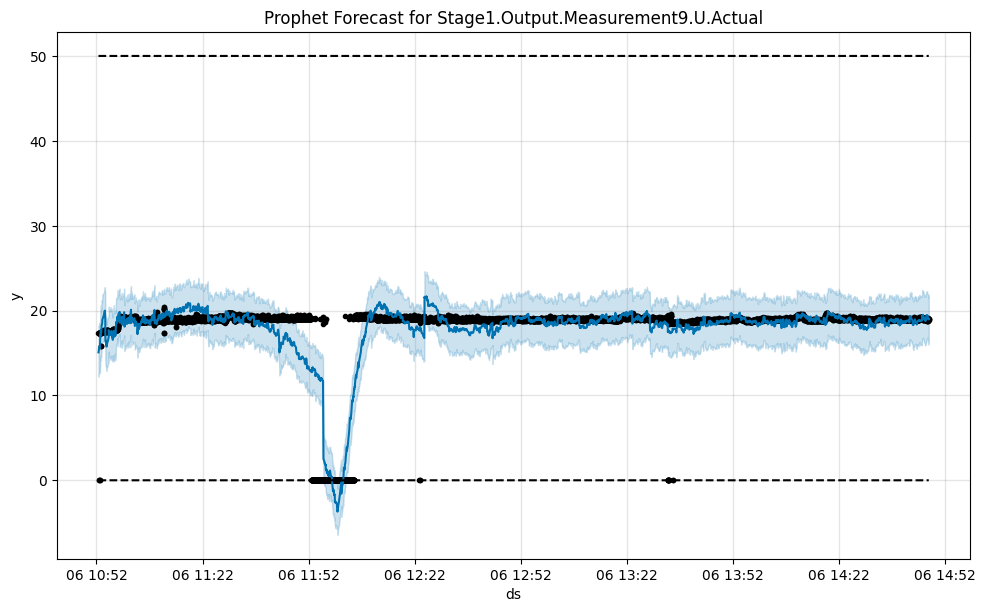

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage1.Output.Measurement10.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/uuf8updz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/zwogq9t3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58414', 'data', 'file=/tmp/tmpgo43gpwg/uuf8updz.json', 'init=/tmp/tmpgo43gpwg/zwogq9t3.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelj93dsrat/prophet_model-20230927083654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:36:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:37:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


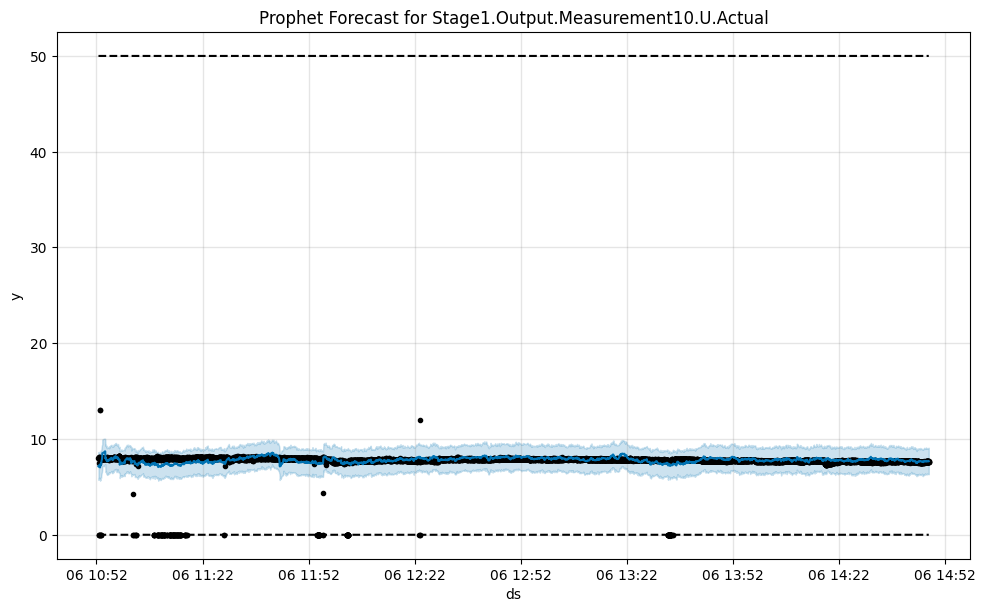

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage1.Output.Measurement11.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/5wnfhl7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/4b_rx39u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49319', 'data', 'file=/tmp/tmpgo43gpwg/5wnfhl7d.json', 'init=/tmp/tmpgo43gpwg/4b_rx39u.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model_x95_pzk/prophet_model-20230927083725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:37:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:38:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


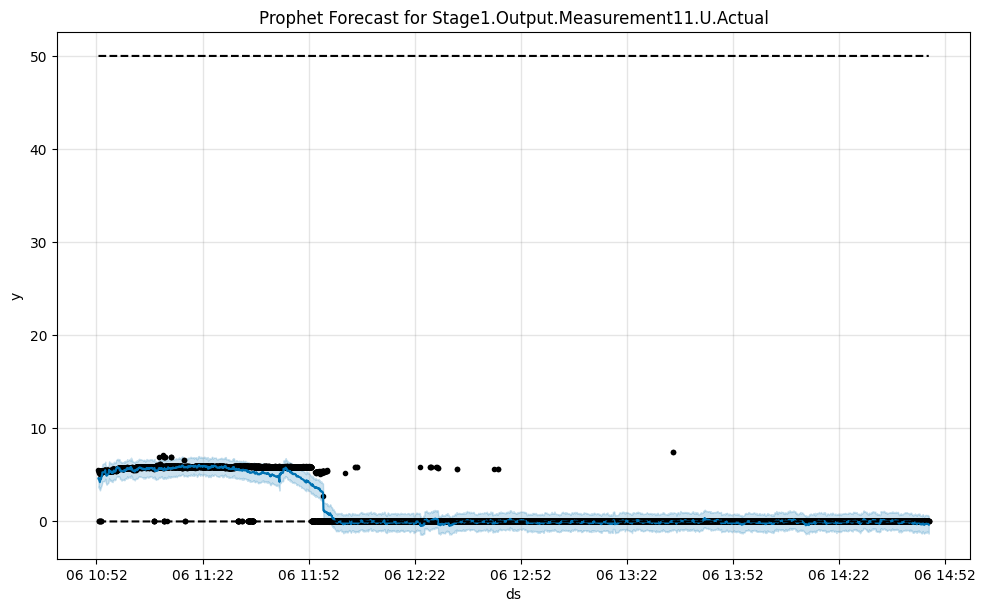

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage1.Output.Measurement12.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/5c17lvqf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/r1b1q88x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91007', 'data', 'file=/tmp/tmpgo43gpwg/5c17lvqf.json', 'init=/tmp/tmpgo43gpwg/r1b1q88x.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modell6qcar38/prophet_model-20230927083807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:38:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:38:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


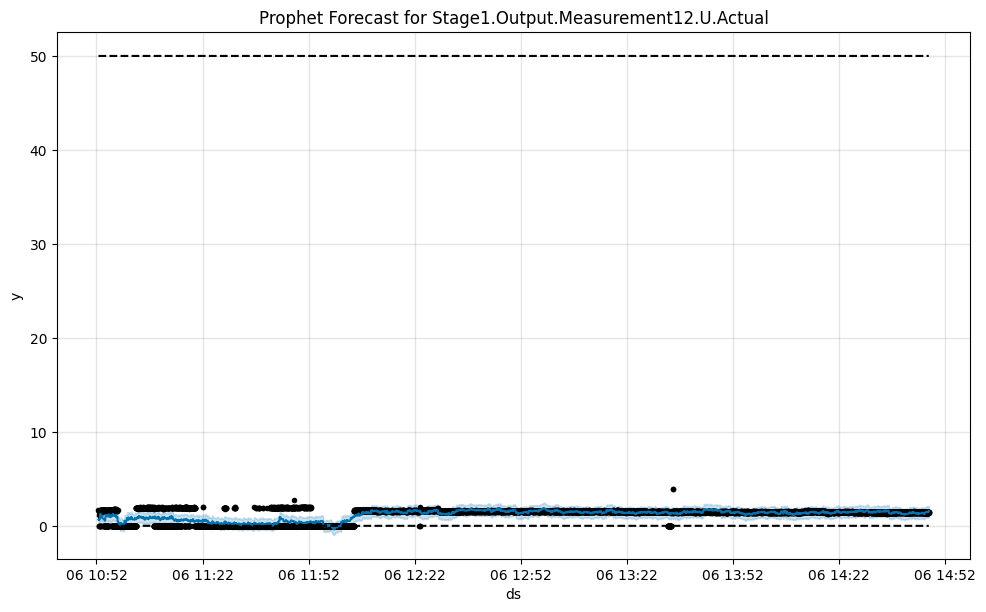

Training model for Stage1.Output.Measurement13.U.Actual...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/xxrappv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/7kse5lgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29981', 'data', 'file=/tmp/tmpgo43gpwg/xxrappv5.json', 'init=/tmp/tmpgo43gpwg/7kse5lgi.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelzdc9butj/prophet_model-20230927083820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:38:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:39:11 - cmdstanpy - INFO - Chain

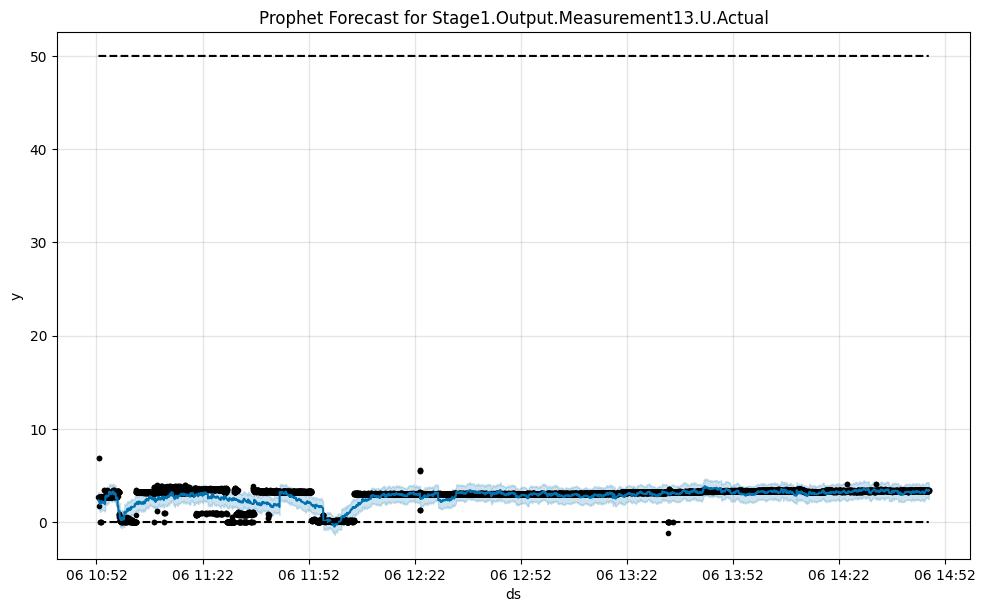

Training model for Stage1.Output.Measurement14.U.Actual...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/66dprc9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/hhaami45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80245', 'data', 'file=/tmp/tmpgo43gpwg/66dprc9l.json', 'init=/tmp/tmpgo43gpwg/hhaami45.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelid9jy433/prophet_model-20230927083916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:39:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:39:44 - cmdstanpy - INFO - Chain

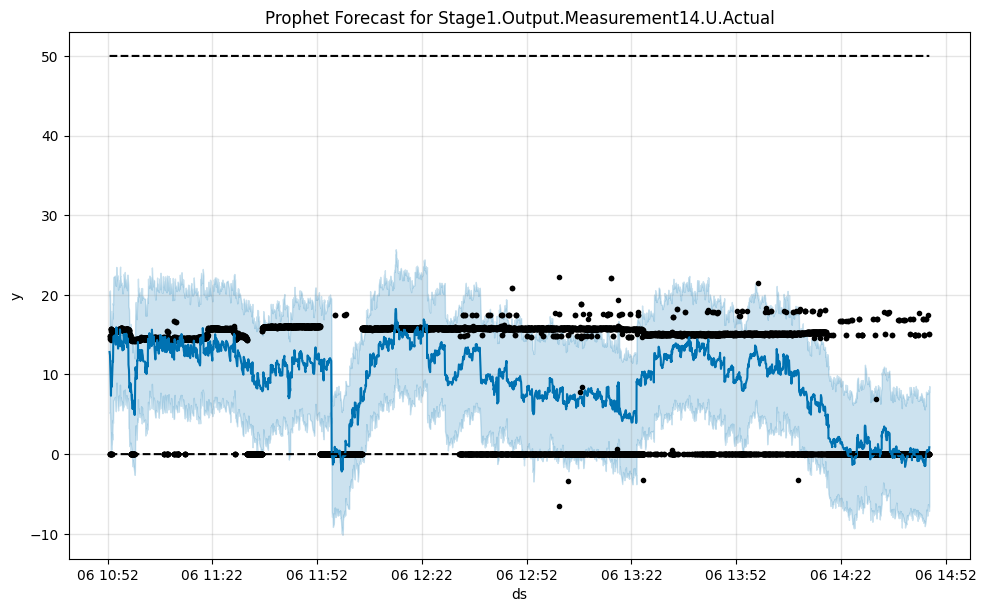

(2818, 15)


In [221]:
from prophet import Prophet
import matplotlib.pyplot as plt

# 1_x.csv의 time_stamp를 ds로 사용
submission1_x  = submission1_x.rename(columns={'time_stamp': 'ds'})
submission1_predict = submission1_predict.rename(columns={'time_stamp': 'ds'})
# 목표 변수 리스트
target_columns = submission1_y.columns.tolist()

# 예측 결과를 저장할 딕셔너리
prophet_results = {}  # 이 부분을 추가합니다.

# 모든 목표 변수에 대해 Prophet 모델 학습
for target in target_columns:
    print(f"Training model for {target}...")

    # 학습 데이터 생성
    df_for_prophet = submission1_x.copy()
    df_for_prophet['y'] = submission1_y[target]
    df_for_prophet['floor'] = 0  # 여기에 하한값을 설정합니다.
    df_for_prophet['cap'] = 50

    # Prophet 모델 생성 및 학습
    model = Prophet(growth='logistic',changepoints=['2019-03-06 12:00:00', '2019-03-06 13:30:00'],changepoint_range=0.9,changepoint_prior_scale = 0.7, seasonality_prior_scale=20)  # 로지스틱 성장 모델로 설정
    model.add_seasonality(name='custom_seconds', period=1, fourier_order=5)

    # 나머지 칼럼들을 add_regressor로 추가
    for col in submission1_x.columns:
        if col not in ['ds', 'y']:  # 'y' 컬럼은 제외
            model.add_regressor(col)

    model.fit(df_for_prophet)

    # 테스트 데이터에 대한 예측
    future = submission1_predict.copy()
    future['floor'] = 0
    future['cap'] = 50
    forecast = model.predict(future)

    # 예측 결과를 딕셔너리에 저장
    prophet_results[target] = forecast['yhat']

    # 시각화
    fig = model.plot(forecast)
    plt.title(f"Prophet Forecast for {target}")
    plt.show()

# 딕셔너리를 데이터프레임으로 변환
df_predictions = pd.DataFrame(prophet_results)

# 결과 확인
print(df_predictions.shape)


In [222]:
df_predictions

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,11.211986,10.212597,10.094466,16.348668,24.379654,-0.046788,4.439073,2.413999,15.836457,15.075401,7.136832,4.611009,0.655641,2.336385,12.827250
1,11.210491,10.245221,10.097868,16.350845,24.363011,-0.047196,4.437919,2.402463,15.797550,15.114811,7.141179,4.611259,0.648264,2.331598,12.764995
2,11.208996,10.277839,10.101269,16.353021,24.346372,-0.047602,4.436766,2.390932,15.758652,15.154201,7.145525,4.611511,0.640889,2.326811,12.702758
3,11.207500,10.310448,10.104669,16.355197,24.329739,-0.048009,4.435612,2.379406,15.719760,15.193571,7.149870,4.611764,0.633516,2.322025,12.640540
4,11.204511,10.375644,10.111465,16.359544,24.296490,-0.048822,4.433305,2.356369,15.642000,15.272253,7.158557,4.612275,0.618776,2.312453,12.516159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,12.876390,-0.712472,11.052624,21.013407,33.900684,-0.003204,-0.202281,-0.168273,20.180626,19.409248,7.693806,-0.254077,1.463640,3.428201,0.460056
2814,12.893462,-0.969936,11.149208,21.194303,34.099291,-0.003359,-0.247230,-0.204132,19.444916,19.117705,7.682370,-0.249213,1.454453,3.381100,0.440643
2815,12.930538,-0.727274,11.148509,21.335231,34.231431,-0.013925,-0.231347,-0.184384,19.473679,18.956625,7.674357,-0.297507,1.481199,3.384379,0.534851
2816,12.939988,-1.015384,11.090337,21.202793,34.168883,-0.007207,-0.275849,-0.126384,19.816314,19.098744,7.662277,-0.344724,1.470931,3.306319,0.607390


In [223]:
df_predictions_zero = df_predictions.copy()
df_predictions_zero[df_predictions_zero < 0] = 0


In [224]:
df_predictions_zero

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,11.211986,10.212597,10.094466,16.348668,24.379654,0.00000,4.439073,2.413999,15.836457,15.075401,7.136832,4.611009,0.655641,2.336385,12.827250
1,11.210491,10.245221,10.097868,16.350845,24.363011,0.00000,4.437919,2.402463,15.797550,15.114811,7.141179,4.611259,0.648264,2.331598,12.764995
2,11.208996,10.277839,10.101269,16.353021,24.346372,0.00000,4.436766,2.390932,15.758652,15.154201,7.145525,4.611511,0.640889,2.326811,12.702758
3,11.207500,10.310448,10.104669,16.355197,24.329739,0.00000,4.435612,2.379406,15.719760,15.193571,7.149870,4.611764,0.633516,2.322025,12.640540
4,11.204511,10.375644,10.111465,16.359544,24.296490,0.00000,4.433305,2.356369,15.642000,15.272253,7.158557,4.612275,0.618776,2.312453,12.516159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,12.876390,0.000000,11.052624,21.013407,33.900684,0.00000,0.000000,0.000000,20.180626,19.409248,7.693806,0.000000,1.463640,3.428201,0.460056
2814,12.893462,0.000000,11.149208,21.194303,34.099291,0.00000,0.000000,0.000000,19.444916,19.117705,7.682370,0.000000,1.454453,3.381100,0.440643
2815,12.930538,0.000000,11.148509,21.335231,34.231431,0.00000,0.000000,0.000000,19.473679,18.956625,7.674357,0.000000,1.481199,3.384379,0.534851
2816,12.939988,0.000000,11.090337,21.202793,34.168883,0.00000,0.000000,0.000000,19.816314,19.098744,7.662277,0.000000,1.470931,3.306319,0.607390


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
np.save('/content/drive/My Drive/submission1.npy', df_predictions)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
from google.colab import drive
drive.mount('/content/drive')
np.save('/content/drive/My Drive/submission1.npy', df_predictions_zero)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
scaler = MinMaxScaler()
df_predictions_scaledzero = pd.DataFrame(scaler.fit_transform(df_predictions_zero), columns=df_predictions_zero.columns)

# 결과를 확인해봅니다.
df_predictions_scaledzero

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,0.175496,0.553683,0.202922,0.092162,0.113516,0.00000,1.000000,0.688773,0.676024,0.695916,0.063022,0.758666,0.346027,0.605892,0.703623
1,0.174954,0.555452,0.204128,0.092487,0.112365,0.00000,0.999740,0.685481,0.674363,0.697735,0.065612,0.758707,0.342133,0.604651,0.700208
2,0.174412,0.557220,0.205333,0.092811,0.111214,0.00000,0.999480,0.682191,0.672702,0.699554,0.068202,0.758749,0.338241,0.603409,0.696795
3,0.173870,0.558988,0.206538,0.093135,0.110063,0.00000,0.999220,0.678902,0.671042,0.701371,0.070792,0.758790,0.334350,0.602168,0.693382
4,0.172787,0.562523,0.208947,0.093783,0.107762,0.00000,0.998701,0.672329,0.667723,0.705003,0.075971,0.758874,0.326571,0.599686,0.686559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,0.778529,0.000000,0.542560,0.787394,0.772236,0.00000,0.000000,0.000000,0.861467,0.895977,0.395003,0.000000,0.772463,0.889031,0.025236
2814,0.784715,0.000000,0.576796,0.814355,0.785977,0.00000,0.000000,0.000000,0.830061,0.882518,0.388187,0.000000,0.767614,0.876817,0.024171
2815,0.798148,0.000000,0.576548,0.835359,0.795119,0.00000,0.000000,0.000000,0.831289,0.875083,0.383411,0.000000,0.781730,0.877667,0.029339
2816,0.801571,0.000000,0.555928,0.815620,0.790792,0.00000,0.000000,0.000000,0.845915,0.881643,0.376211,0.000000,0.776311,0.857424,0.033318


In [227]:
scaler = MinMaxScaler()
submission1_y_scaled = pd.DataFrame(scaler.fit_transform(submission1_y), columns=submission1_y.columns)

# 결과를 확인해봅니다.
submission1_y_scaled

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,0.609195,0.140656,0.663403,0.837271,0.177675,0.102467,0.584199,0.621871,9.269813e-01,0.845993,0.616722,7.416332e-01,0.420305,0.481260,0.729927
1,0.588602,0.140656,0.191314,0.679497,0.921458,0.102467,0.590676,0.127782,2.933353e-21,0.845993,0.576940,6.894244e-01,0.291203,0.484948,0.226994
2,0.600575,0.140656,0.652921,0.836890,0.177675,0.102467,0.566065,0.618510,9.194123e-01,0.846482,0.609836,7.148594e-01,0.410180,0.476343,0.733047
3,0.591475,0.140656,0.191314,0.689787,0.930684,0.102467,0.305703,0.127782,2.933353e-21,0.847949,0.000110,2.186948e-21,0.000090,0.368170,0.226994
4,0.579502,0.140656,0.191314,0.000000,0.953868,0.102467,0.477982,0.127782,2.933353e-21,0.000178,0.000110,2.186948e-21,0.000090,1.000000,0.226994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,0.606801,0.140656,0.661850,0.818979,0.953868,0.102467,0.290159,0.613468,9.296527e-01,0.934975,0.578470,2.186948e-21,0.354488,0.566078,0.226994
11266,0.603927,0.140656,0.546157,0.819360,0.924060,0.102467,0.361403,0.636996,9.296527e-01,0.926663,0.581530,2.186948e-21,0.359551,0.569765,0.226994
11267,0.603927,0.140656,0.546157,0.819360,0.924060,0.102467,0.361403,0.636996,9.296527e-01,0.926663,0.581530,2.186948e-21,0.359551,0.569765,0.226994
11268,0.603927,0.140656,0.546157,0.819360,0.924060,0.102467,0.361403,0.636996,9.296527e-01,0.926663,0.581530,2.186948e-21,0.359551,0.569765,0.226994


In [241]:
# 두 데이터프레임을 합칩니다.
submission2_predict = pd.concat([submission2_predict, df_predictions_scaledzero], axis=1)

In [242]:
submission2_predict

,Machine4.Temperature1.C.Actual,Machine4.Temperature2.C.Actual,Machine4.Pressure.C.Actual,Machine4.Temperature3.C.Actual,Machine4.Temperature4.C.Actual,Machine4.Temperature5.C.Actual,Machine4.ExitTemperature.U.Actual,Machine5.Temperature1.C.Actual,Machine5.Temperature2.C.Actual,Machine5.Temperature3.C.Actual,...,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,0.000000,0.000000,0.8,0.000000,0.8,0.000000,0.000000,0.444444,0.4,0.016129,...,0.00000,1.000000,0.688773,0.676024,0.695916,0.063022,0.758666,0.346027,0.605892,0.703623
1,0.032609,0.018349,0.7,0.087719,0.7,0.047619,0.000000,0.444444,0.4,0.016129,...,0.00000,0.999740,0.685481,0.674363,0.697735,0.065612,0.758707,0.342133,0.604651,0.700208
2,0.065217,0.036697,0.8,0.122807,0.8,0.095238,0.000000,0.444444,0.4,0.016129,...,0.00000,0.999480,0.682191,0.672702,0.699554,0.068202,0.758749,0.338241,0.603409,0.696795
3,0.097826,0.064220,0.9,0.140351,0.9,0.142857,0.000000,0.444444,0.4,0.016129,...,0.00000,0.999220,0.678902,0.671042,0.701371,0.070792,0.758790,0.334350,0.602168,0.693382
4,0.173913,0.110092,0.7,0.210526,0.7,0.238095,0.000000,0.444444,0.2,0.016129,...,0.00000,0.998701,0.672329,0.667723,0.705003,0.075971,0.758874,0.326571,0.599686,0.686559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,0.641304,0.669725,0.4,0.982456,0.4,0.777778,0.898305,0.666667,0.6,1.000000,...,0.00000,0.000000,0.000000,0.861467,0.895977,0.395003,0.000000,0.772463,0.889031,0.025236
2814,0.641304,0.669725,0.3,0.982456,0.3,0.761905,0.903955,0.666667,0.6,1.000000,...,0.00000,0.000000,0.000000,0.830061,0.882518,0.388187,0.000000,0.767614,0.876817,0.024171
2815,0.652174,0.660550,0.4,0.982456,0.4,0.761905,0.909605,0.666667,0.6,1.000000,...,0.00000,0.000000,0.000000,0.831289,0.875083,0.383411,0.000000,0.781730,0.877667,0.029339
2816,0.652174,0.660550,0.3,0.982456,0.3,0.761905,0.903955,0.666667,0.4,1.000000,...,0.00000,0.000000,0.000000,0.845915,0.881643,0.376211,0.000000,0.776311,0.857424,0.033318


In [230]:
submission2_x = pd.concat([submission2_x_dropped,submission1_y_scaled], axis=1)

In [231]:
# 가정: submission2_x와 submission1_y는 이미 정의된 DataFrame이고, 'ds'는 날짜를 나타내는 칼럼입니다.
# 겹치는 칼럼을 찾습니다.
common_columns = set(submission1_y.columns) & set(submission2_x.columns)

# 'ds' 칼럼은 제외하고 나머지 겹치는 칼럼을 삭제합니다.
common_columns.discard('ds')

# 겹치는 칼럼을 삭제합니다.
submission2_x_dropped = submission2_x.drop(columns=list(common_columns))

# 결과 DataFrame 확인
submission2_x_dropped

,Machine4.Temperature1.C.Actual,Machine4.Temperature2.C.Actual,Machine4.Pressure.C.Actual,Machine4.Temperature3.C.Actual,Machine4.Temperature4.C.Actual,Machine4.Temperature5.C.Actual,Machine4.ExitTemperature.U.Actual,Machine5.Temperature1.C.Actual,Machine5.Temperature2.C.Actual,Machine5.Temperature3.C.Actual,Machine5.Temperature4.C.Actual,Machine5.Temperature5.C.Actual,Machine5.Temperature6.C.Actual,Machine5.ExitTemperature.U.Actual,ds
0,0.000000,0.000000,0.636364,0.000000,0.636364,0.000000,0.000000,0.444444,0.333333,0.016129,0.135135,0.75,1.000000,0.040422,2019-03-06 10:52:33
1,0.200000,0.133929,0.727273,0.203390,0.727273,0.227273,0.000000,0.444444,0.166667,0.016129,0.135135,0.75,1.000000,0.032513,2019-03-06 10:52:38
2,0.242105,0.160714,1.000000,0.271186,1.000000,0.348485,0.000000,0.333333,0.166667,0.016129,0.135135,0.75,0.969697,0.035149,2019-03-06 10:52:40
3,0.305263,0.214286,1.000000,0.338983,1.000000,0.424242,0.005525,0.111111,0.166667,0.016129,0.135135,0.75,0.969697,0.035149,2019-03-06 10:52:42
4,0.336842,0.241071,0.909091,0.389831,0.909091,0.454545,0.011050,0.000000,0.166667,0.016129,0.135135,0.75,0.969697,0.027241,2019-03-06 10:52:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,0.652632,0.669643,0.363636,0.983051,0.363636,0.772727,0.889503,0.666667,0.500000,1.000000,0.959459,0.75,0.272727,0.964851,2019-03-06 14:47:13
11266,0.663158,0.669643,0.363636,0.983051,0.363636,0.772727,0.883978,0.666667,0.333333,1.000000,0.959459,0.75,0.272727,0.966608,2019-03-06 14:47:16
11267,0.663158,0.669643,0.454545,0.983051,0.454545,0.772727,0.883978,0.666667,0.333333,1.000000,0.959459,0.75,0.272727,0.963972,2019-03-06 14:47:17
11268,0.663158,0.669643,0.272727,0.983051,0.272727,0.772727,0.883978,0.666667,0.333333,1.000000,0.959459,0.75,0.272727,0.963972,2019-03-06 14:47:18


In [236]:
submission2_x

,Machine4.Temperature1.C.Actual,Machine4.Temperature2.C.Actual,Machine4.Pressure.C.Actual,Machine4.Temperature3.C.Actual,Machine4.Temperature4.C.Actual,Machine4.Temperature5.C.Actual,Machine4.ExitTemperature.U.Actual,Machine5.Temperature1.C.Actual,Machine5.Temperature2.C.Actual,Machine5.Temperature3.C.Actual,...,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,0.000000,0.000000,0.636364,0.000000,0.636364,0.000000,0.000000,0.444444,0.333333,0.016129,...,0.102467,0.584199,0.621871,9.269813e-01,0.845993,0.616722,7.416332e-01,0.420305,0.481260,0.729927
1,0.200000,0.133929,0.727273,0.203390,0.727273,0.227273,0.000000,0.444444,0.166667,0.016129,...,0.102467,0.590676,0.127782,2.933353e-21,0.845993,0.576940,6.894244e-01,0.291203,0.484948,0.226994
2,0.242105,0.160714,1.000000,0.271186,1.000000,0.348485,0.000000,0.333333,0.166667,0.016129,...,0.102467,0.566065,0.618510,9.194123e-01,0.846482,0.609836,7.148594e-01,0.410180,0.476343,0.733047
3,0.305263,0.214286,1.000000,0.338983,1.000000,0.424242,0.005525,0.111111,0.166667,0.016129,...,0.102467,0.305703,0.127782,2.933353e-21,0.847949,0.000110,2.186948e-21,0.000090,0.368170,0.226994
4,0.336842,0.241071,0.909091,0.389831,0.909091,0.454545,0.011050,0.000000,0.166667,0.016129,...,0.102467,0.477982,0.127782,2.933353e-21,0.000178,0.000110,2.186948e-21,0.000090,1.000000,0.226994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,0.652632,0.669643,0.363636,0.983051,0.363636,0.772727,0.889503,0.666667,0.500000,1.000000,...,0.102467,0.290159,0.613468,9.296527e-01,0.934975,0.578470,2.186948e-21,0.354488,0.566078,0.226994
11266,0.663158,0.669643,0.363636,0.983051,0.363636,0.772727,0.883978,0.666667,0.333333,1.000000,...,0.102467,0.361403,0.636996,9.296527e-01,0.926663,0.581530,2.186948e-21,0.359551,0.569765,0.226994
11267,0.663158,0.669643,0.454545,0.983051,0.454545,0.772727,0.883978,0.666667,0.333333,1.000000,...,0.102467,0.361403,0.636996,9.296527e-01,0.926663,0.581530,2.186948e-21,0.359551,0.569765,0.226994
11268,0.663158,0.669643,0.272727,0.983051,0.272727,0.772727,0.883978,0.666667,0.333333,1.000000,...,0.102467,0.361403,0.636996,9.296527e-01,0.926663,0.581530,2.186948e-21,0.359551,0.569765,0.226994


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage2.Output.Measurement0.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/x10iztnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/xpdduz5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65919', 'data', 'file=/tmp/tmpgo43gpwg/x10iztnq.json', 'init=/tmp/tmpgo43gpwg/xpdduz5r.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model6ne_bdrv/prophet_model-20230927084748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:47:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:48:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


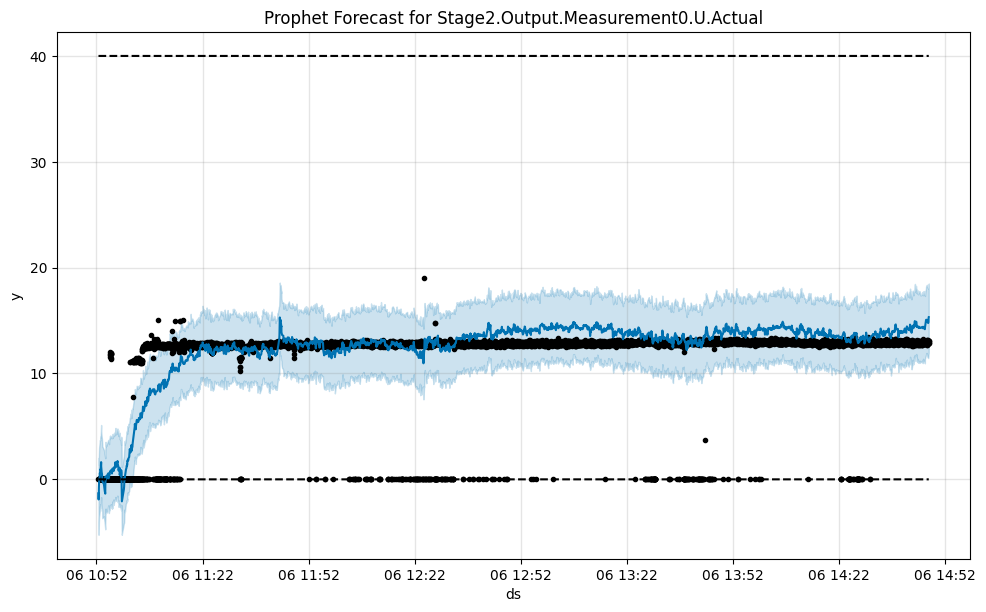

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage2.Output.Measurement1.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/m362pjqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/g0gyj4bf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11175', 'data', 'file=/tmp/tmpgo43gpwg/m362pjqt.json', 'init=/tmp/tmpgo43gpwg/g0gyj4bf.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model7kayehsa/prophet_model-20230927084814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:48:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:48:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


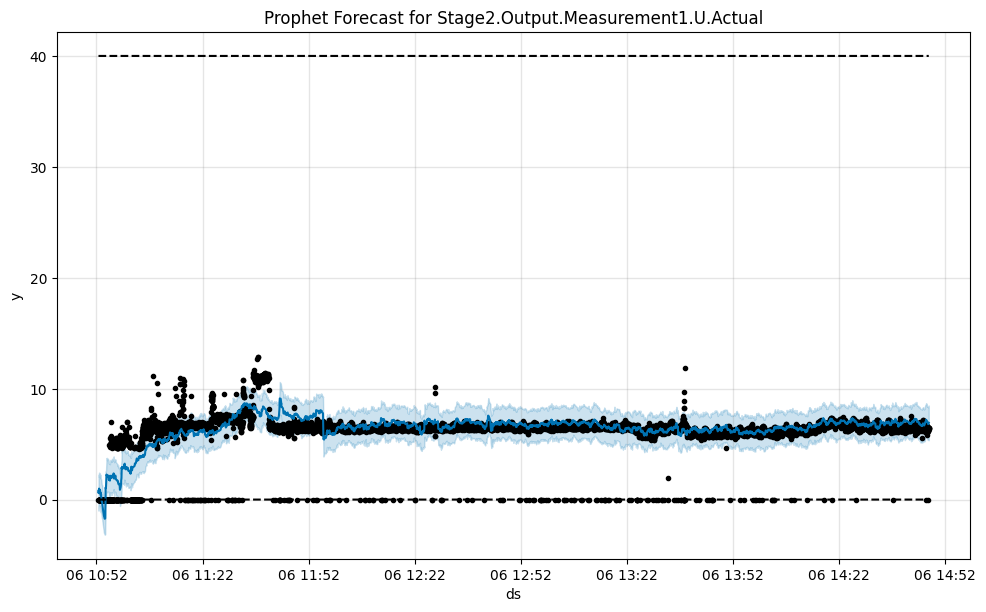

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Training model for Stage2.Output.Measurement2.U.Actual...


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/lb2labg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/3k3bizv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11933', 'data', 'file=/tmp/tmpgo43gpwg/lb2labg7.json', 'init=/tmp/tmpgo43gpwg/3k3bizv4.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelqh6r6cr_/prophet_model-20230927084849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:48:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:49:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


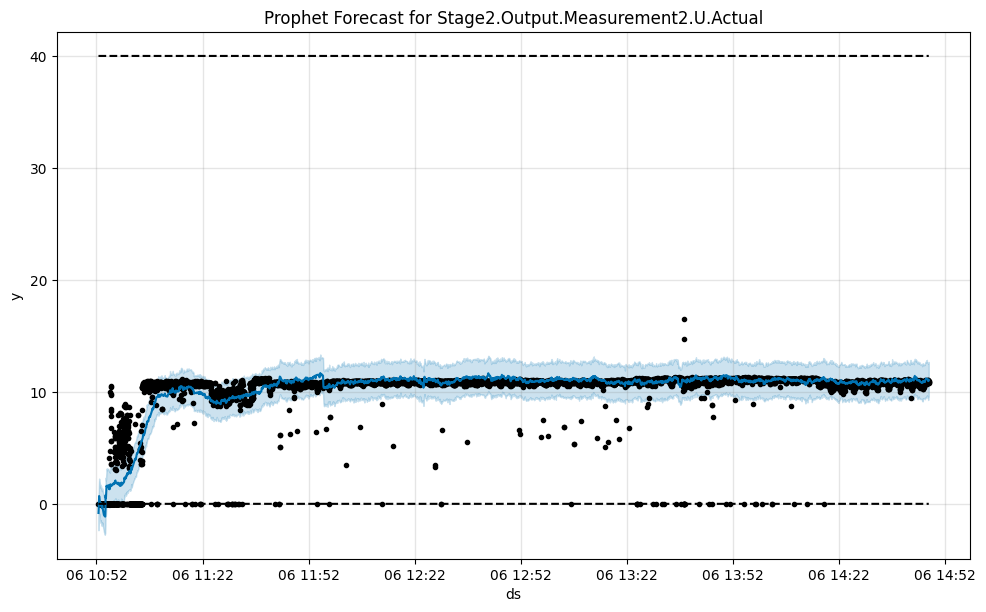

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage2.Output.Measurement3.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/uw7gi7em.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/h0j65r6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78214', 'data', 'file=/tmp/tmpgo43gpwg/uw7gi7em.json', 'init=/tmp/tmpgo43gpwg/h0j65r6_.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelmgxr3z8f/prophet_model-20230927084937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:50:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


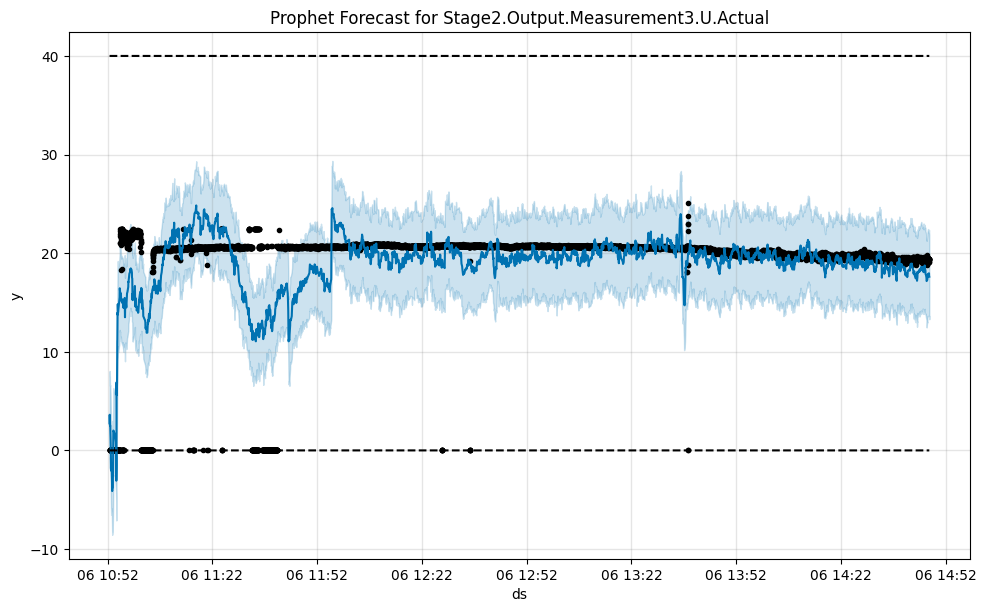

Training model for Stage2.Output.Measurement4.U.Actual...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/5fh4ajh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/zca5b9hu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38584', 'data', 'file=/tmp/tmpgo43gpwg/5fh4ajh6.json', 'init=/tmp/tmpgo43gpwg/zca5b9hu.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model4ub0nwh0/prophet_model-20230927085030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:50:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:16 - cmdstanpy - INFO - Chain

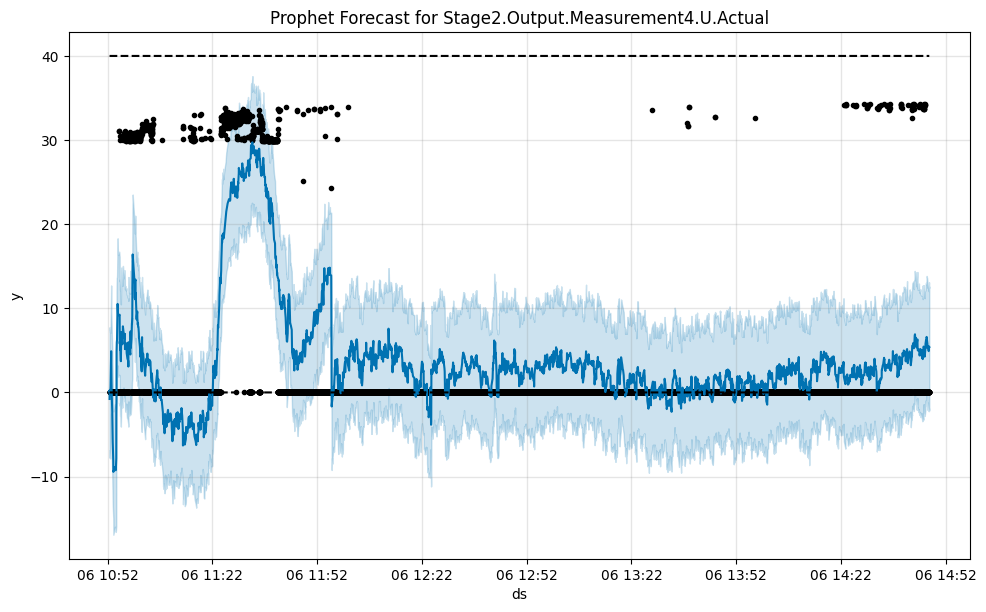

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Training model for Stage2.Output.Measurement5.U.Actual...


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/btlihzbe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/8qi2uw8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54260', 'data', 'file=/tmp/tmpgo43gpwg/btlihzbe.json', 'init=/tmp/tmpgo43gpwg/8qi2uw8p.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model1vh287wv/prophet_model-20230927085120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


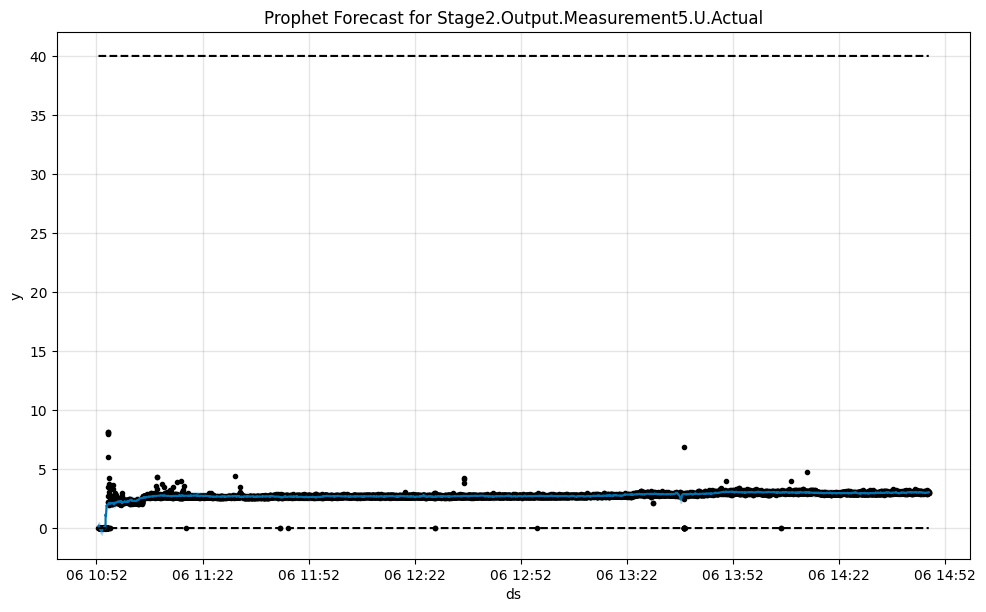

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage2.Output.Measurement6.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/seljgyr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/lvsjcwq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71718', 'data', 'file=/tmp/tmpgo43gpwg/seljgyr9.json', 'init=/tmp/tmpgo43gpwg/lvsjcwq7.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelk2fgc5ny/prophet_model-20230927085150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:52:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


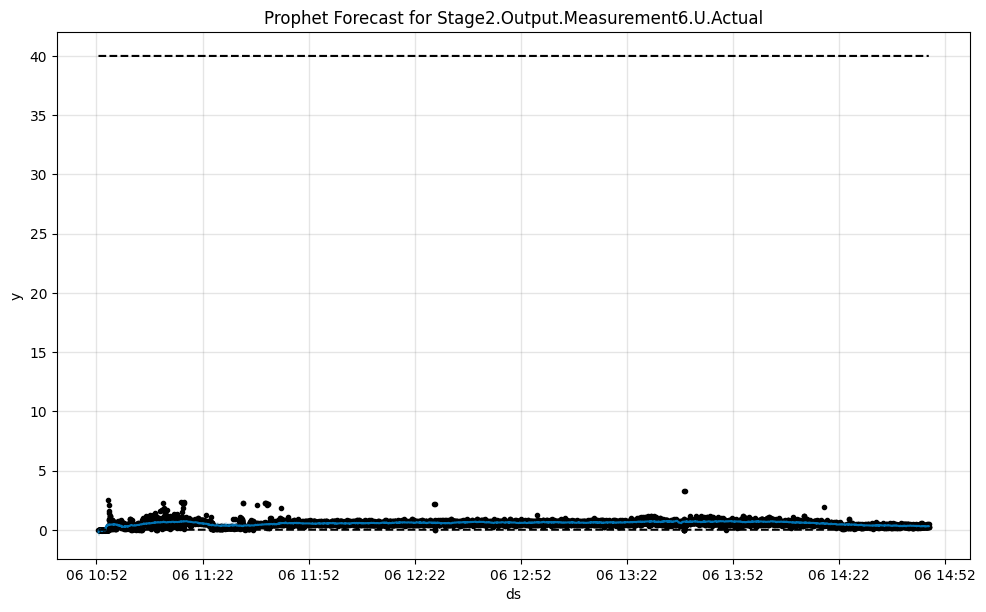

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage2.Output.Measurement7.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/9j3yvd54.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/e7wgnjn_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72615', 'data', 'file=/tmp/tmpgo43gpwg/9j3yvd54.json', 'init=/tmp/tmpgo43gpwg/e7wgnjn_.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model2tvv26z7/prophet_model-20230927085241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:52:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:53:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


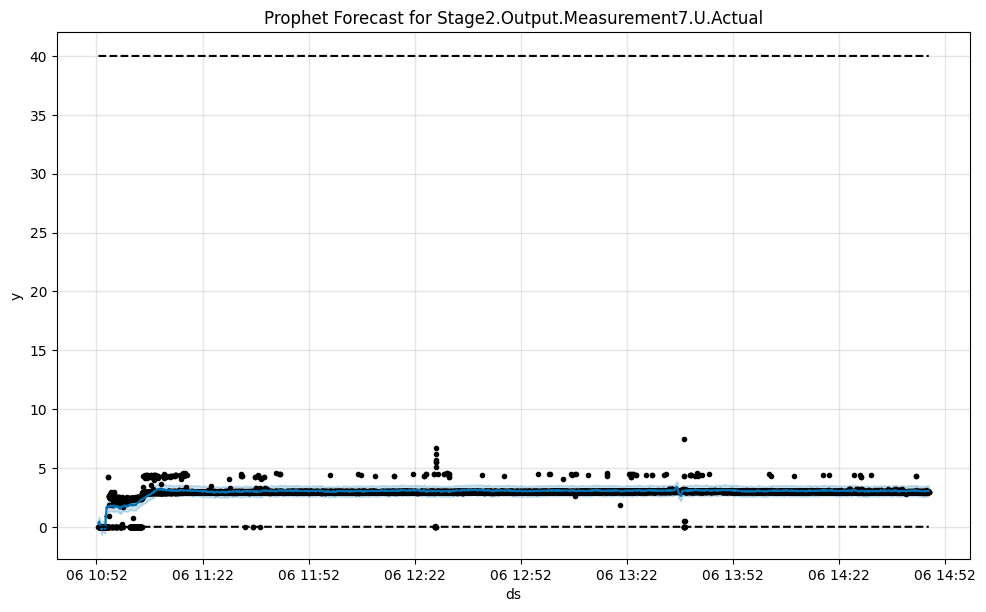

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage2.Output.Measurement8.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/16xf3ziz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/xp2ttz2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72293', 'data', 'file=/tmp/tmpgo43gpwg/16xf3ziz.json', 'init=/tmp/tmpgo43gpwg/xp2ttz2s.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelbi4k3axp/prophet_model-20230927085329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:53:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:54:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


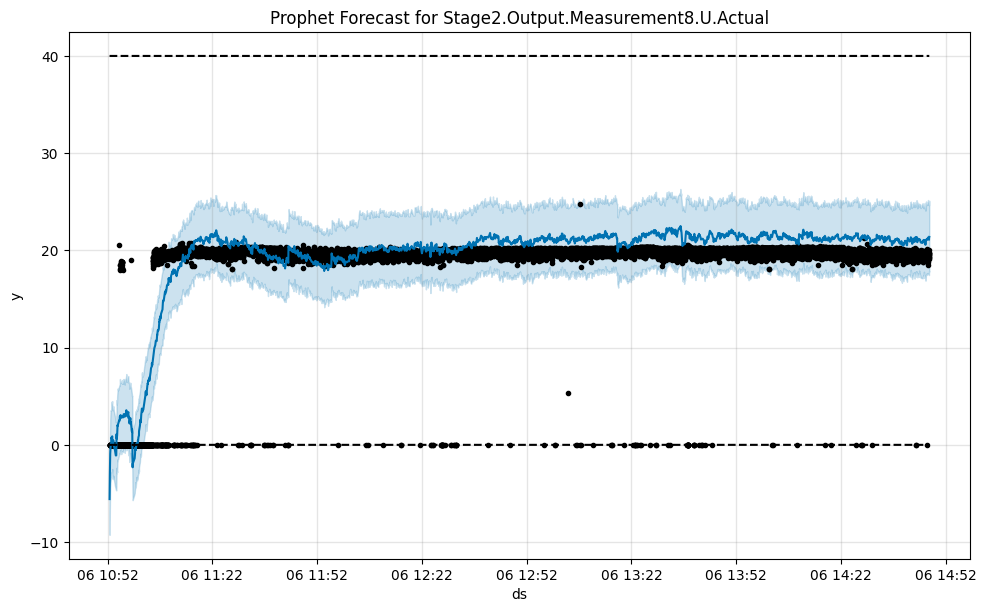

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage2.Output.Measurement9.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/czcycgmw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/vpvmxqe6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53286', 'data', 'file=/tmp/tmpgo43gpwg/czcycgmw.json', 'init=/tmp/tmpgo43gpwg/vpvmxqe6.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modeld6bmt7q5/prophet_model-20230927085419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:54:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


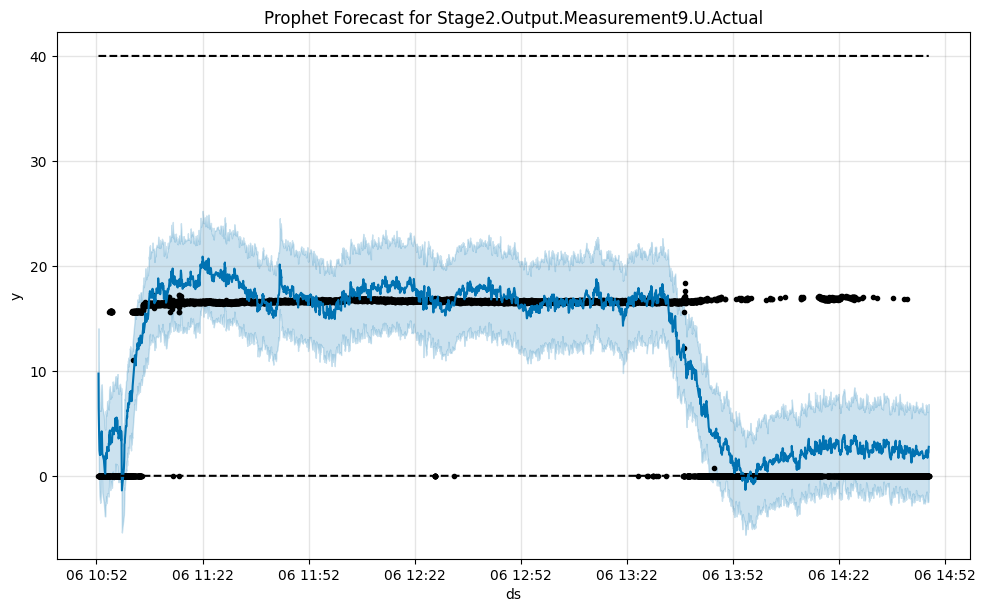

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Training model for Stage2.Output.Measurement10.U.Actual...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/plmv_08e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/jfzv58v0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77661', 'data', 'file=/tmp/tmpgo43gpwg/plmv_08e.json', 'init=/tmp/tmpgo43gpwg/jfzv58v0.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelofx1db4x/prophet_model-20230927085526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


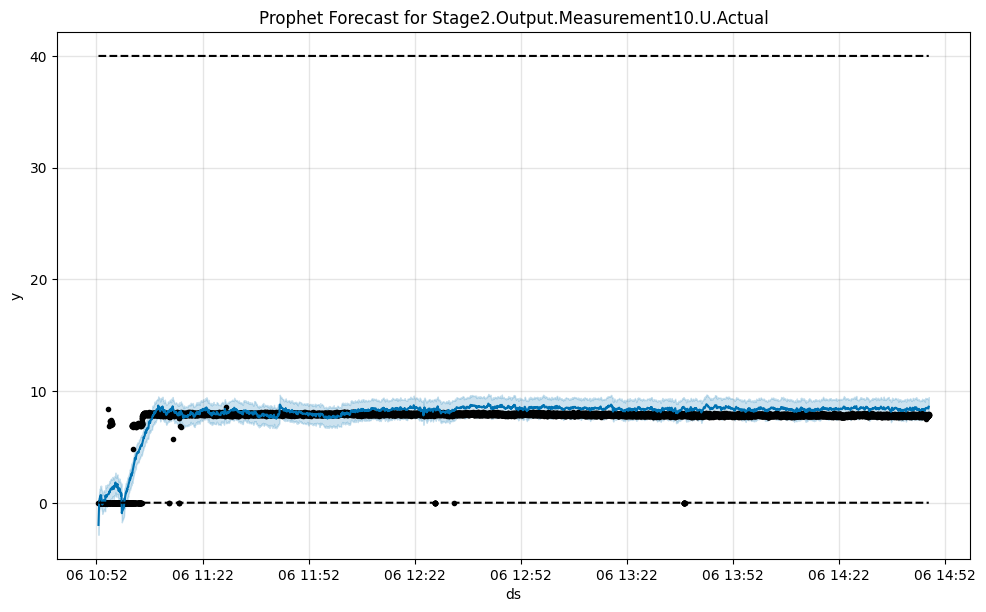

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage2.Output.Measurement11.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/4ckzn59g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/_p2kbbs_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23131', 'data', 'file=/tmp/tmpgo43gpwg/4ckzn59g.json', 'init=/tmp/tmpgo43gpwg/_p2kbbs_.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_model_k975nw9/prophet_model-20230927085601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:56:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:56:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


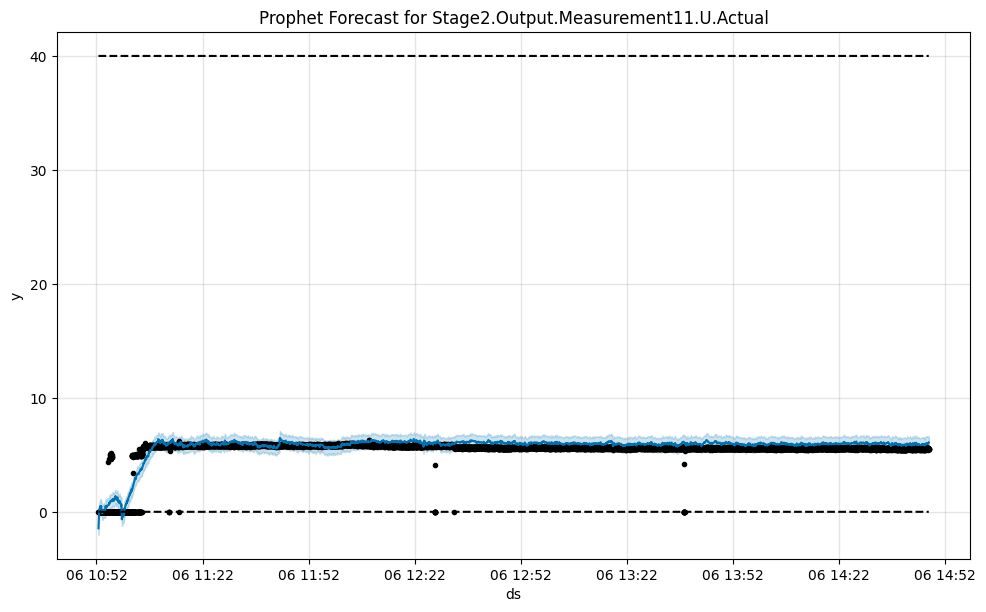

Training model for Stage2.Output.Measurement12.U.Actual...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/03qzhcko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/q_be61_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98799', 'data', 'file=/tmp/tmpgo43gpwg/03qzhcko.json', 'init=/tmp/tmpgo43gpwg/q_be61_c.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelvjwzh786/prophet_model-20230927085635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:56:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:57:18 - cmdstanpy - INFO - Chain

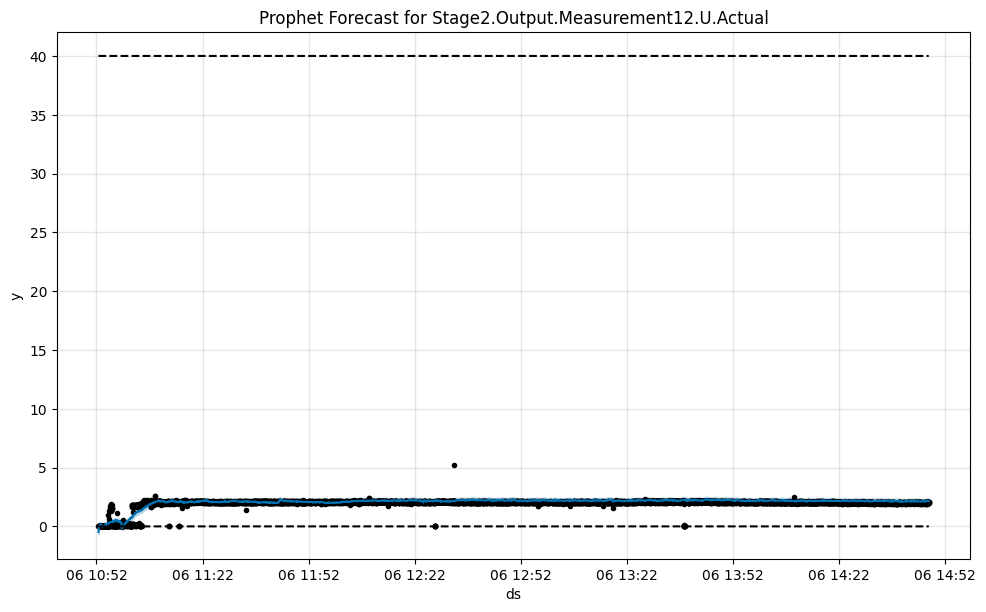

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training model for Stage2.Output.Measurement13.U.Actual...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/_nkgvpen.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/psnu25dy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20837', 'data', 'file=/tmp/tmpgo43gpwg/_nkgvpen.json', 'init=/tmp/tmpgo43gpwg/psnu25dy.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modeldjbopr5l/prophet_model-20230927085722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:57:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:58:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


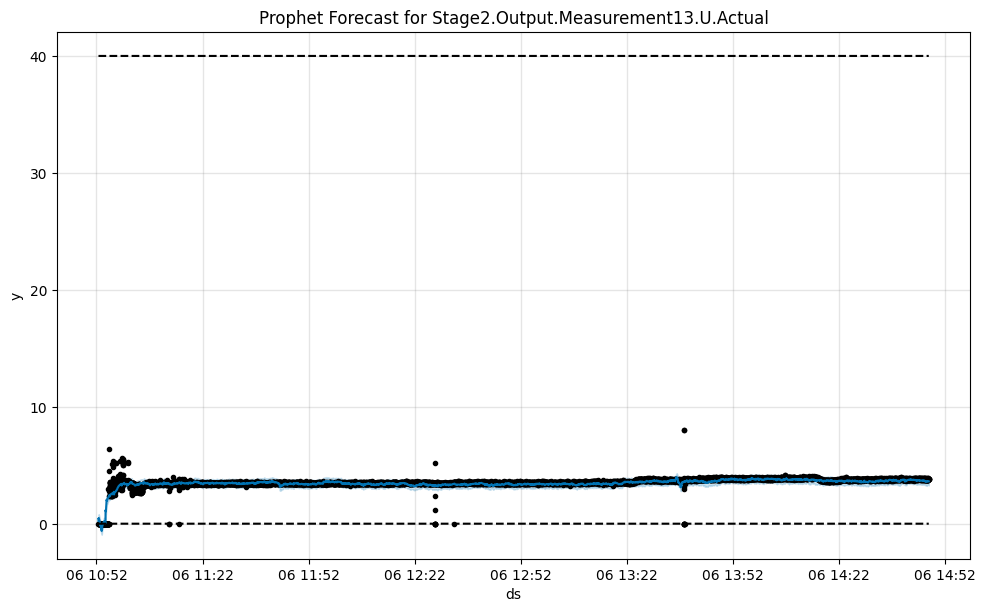

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Training model for Stage2.Output.Measurement14.U.Actual...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/4zkm5fsv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo43gpwg/xfu8ny5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76008', 'data', 'file=/tmp/tmpgo43gpwg/4zkm5fsv.json', 'init=/tmp/tmpgo43gpwg/xfu8ny5h.json', 'output', 'file=/tmp/tmpgo43gpwg/prophet_modelkyuc_wwr/prophet_model-20230927085813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:58:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:58:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


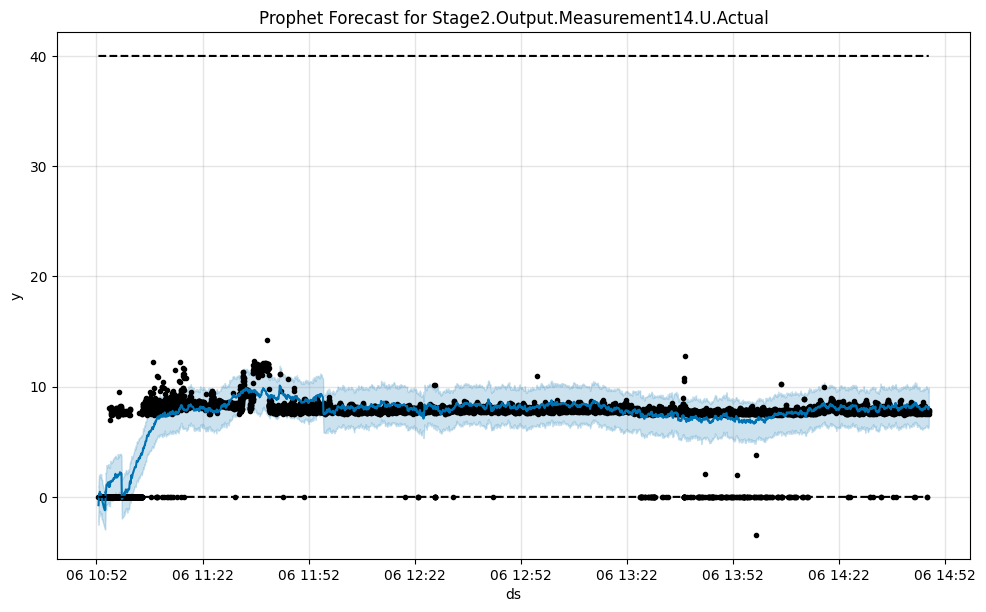

(2818, 15)


In [243]:

# 목표 변수 리스트
target_columns = submission2_y.columns.tolist()

# 예측 결과를 저장할 딕셔너리
prophet_results = {}  # 이 부분을 추가합니다.

# 모든 목표 변수에 대해 Prophet 모델 학습
for target in target_columns:
    print(f"Training model for {target}...")

     # 학습 데이터 생성
    df_for_prophet = submission2_x.copy()
    df_for_prophet['y'] = submission2_y[target]
    df_for_prophet['floor'] = 0  # 여기에 하한값을 설정합니다.
    df_for_prophet['cap'] = 40

    # Prophet 모델 생성 및 학습
    model = Prophet(growth='logistic',changepoint_range=0.9,changepoint_prior_scale = 0.7, seasonality_prior_scale=20)  # 로지스틱 성장 모델로 설정

    # 나머지 칼럼들을 add_regressor로 추가
    for col in submission2_x.columns:
        if col not in ['ds', 'y']:  # 'y' 컬럼은 제외
            model.add_regressor(col)
    model.fit(df_for_prophet)

    # 테스트 데이터에 대한 예측
    future = submission2_predict.copy()
    future['floor'] = 0
    future['cap'] = 40
    forecast = model.predict(future)

    # 예측 결과를 딕셔너리에 저장
    prophet_results[target] = forecast['yhat']

    # 시각화
    fig = model.plot(forecast)
    plt.title(f"Prophet Forecast for {target}")
    plt.show()

# 딕셔너리를 데이터프레임으로 변환
df_predictions2 = pd.DataFrame(prophet_results)

# 결과 확인
print(df_predictions2.shape)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
np.save('/content/drive/My Drive/submission2.npy', df_predictions2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_predictions2

,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement1.U.Actual,Stage2.Output.Measurement2.U.Actual,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement14.U.Actual
0,-2.039926,1.407532,-1.995905,-1.229277,10.844934,0.199451,0.182770,0.084149,-7.515347,13.723080,-2.324843,-1.614714,-0.591248,0.212481,-0.507452
1,-2.491569,0.841184,-2.009289,-0.450937,11.639153,0.191872,0.104757,0.092732,-7.714459,10.226729,-2.215095,-1.523100,-0.541568,0.392221,-0.899902
2,-2.806029,0.681661,-1.836850,-0.293604,9.633855,0.206335,0.115261,0.136066,-7.344950,9.140824,-2.015804,-1.349010,-0.485975,0.429975,-0.889620
3,-2.378783,0.670421,-1.658240,-0.309682,11.102251,0.174704,0.060243,0.117870,-7.426267,8.138911,-1.899166,-1.281303,-0.460273,0.400333,-0.903733
4,-2.057038,0.581455,-1.374600,0.433298,11.278254,0.174276,0.049274,0.177618,-6.192025,6.527374,-1.612303,-1.058460,-0.379831,0.483164,-0.643947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,12.822408,6.567803,10.932612,20.336388,-1.238853,3.022763,0.282304,3.037572,19.934881,0.643204,7.895562,5.578660,2.012001,3.822169,7.902049
2814,12.549943,6.421425,10.714834,20.151489,0.062433,2.999371,0.262819,2.985099,19.538074,0.881854,7.719161,5.459162,1.967527,3.803127,7.774237
2815,12.802358,6.580243,10.833559,20.394578,-1.815862,3.024056,0.297521,3.029616,20.026063,1.285219,7.870757,5.561423,2.002753,3.799977,7.877242
2816,13.278140,6.657637,10.931769,20.126697,-1.565936,3.031312,0.297979,3.049055,20.206684,1.754125,7.959095,5.627781,2.022413,3.795384,8.052954


In [244]:
df_predictions_zero2 = df_predictions2.copy()
df_predictions_zero2[df_predictions_zero2 < 0] = 0

In [245]:
df_predictions_zero2

,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement1.U.Actual,Stage2.Output.Measurement2.U.Actual,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement5.U.Actual,Stage2.Output.Measurement6.U.Actual,Stage2.Output.Measurement7.U.Actual,Stage2.Output.Measurement8.U.Actual,Stage2.Output.Measurement9.U.Actual,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement14.U.Actual
0,0.000000,0.791254,0.000000,2.743165,0.000000,0.166972,0.000000,0.252624,0.000000,9.740908,0.000000,0.000000,0.000000,0.236636,0.000000
1,0.000000,0.585349,0.000000,3.403969,0.039146,0.195794,0.000000,0.315813,0.000000,7.719271,0.000000,0.000000,0.000000,0.397275,0.000000
2,0.000000,0.583546,0.000000,3.614716,0.251160,0.212208,0.000000,0.349168,0.000000,6.830846,0.000000,0.000000,0.000000,0.445962,0.000000
3,0.000000,0.627199,0.000000,3.396965,0.056932,0.196558,0.000000,0.345351,0.000000,6.475127,0.000000,0.000000,0.000000,0.415993,0.000000
4,0.000000,0.698181,0.000000,3.334080,0.258682,0.205359,0.000000,0.403919,0.000000,5.798181,0.000000,0.000000,0.000000,0.475297,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,14.870317,6.952714,11.143354,17.902729,5.531552,3.025549,0.314111,3.051855,21.319133,1.714007,8.520658,6.023814,2.162746,3.651210,8.133477
2814,14.767049,6.805969,10.964254,17.910102,4.910248,3.002648,0.296565,3.015993,21.136930,2.201105,8.434545,5.963497,2.140079,3.621795,7.976446
2815,14.852883,6.833233,10.963898,17.960612,5.424640,3.017391,0.287570,3.026652,21.087864,2.225586,8.457085,5.986119,2.146837,3.630186,7.942474
2816,15.217771,6.900395,11.069080,17.720765,5.467252,3.029351,0.286889,3.044973,21.281243,2.599837,8.517422,6.028935,2.158704,3.634470,8.135581


In [246]:
from google.colab import drive
drive.mount('/content/drive')
np.save('/content/drive/My Drive/submission2.npy', df_predictions_zero2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 제출 및 채점

아래 코드를 수정하면 정상적인 채점을 수행할 수 없습니다.

In [ ]:
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [ ]:
# 제출 파일 업로드
await upload()

In [ ]:
# 채점 수행
await check_score()